In [401]:
import numpy as np
from tinygrad import Tensor, dtypes
from tinygrad.helpers import fetch
from PIL import Image
from scipy import signal


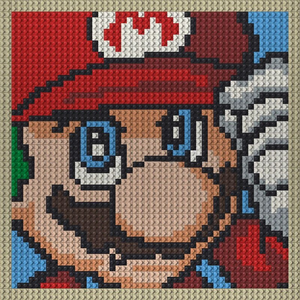

In [170]:
size = 300
img = Image.open(fetch("https://ae01.alicdn.com/kf/U4ac877fec5db4eafb2bccabff28a4158M/New-MOC-Pixel-Art-Marioeds-Mosaic-Painting-Building-Blocks-Kids-Toys-Home-Decoration-Paintings-Puzzle-DIY.jpg")).resize((size, size), Image.Resampling.LANCZOS)
display(img)

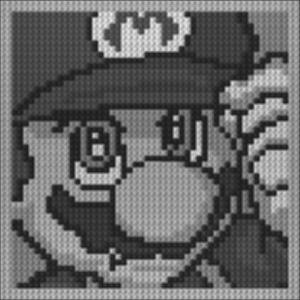

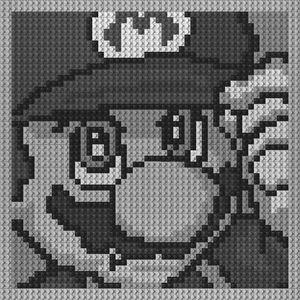

In [403]:
t = np.array(img.convert('L')).astype(np.float32) / 255
wt = np.full((3, 3), 1/9)
t = signal.convolve(t, wt, mode='same')
t = t.reshape(size, size) * 255
ti = Image.fromarray(t.astype(np.uint8), 'L')

display(ti, img.convert('L'))

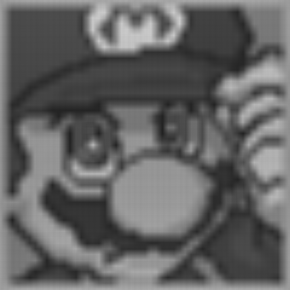

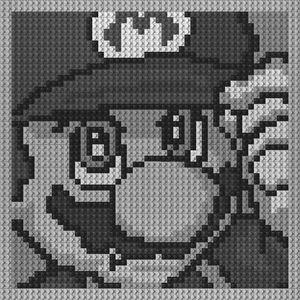

In [488]:
# blur
x = Tensor(np.array(img.convert('L')).reshape(1, 1, size, size), dtype=dtypes.float32) / 255
w = Tensor.full((1, 1, 11, 11), 1/(11*11), dtype=dtypes.float32)
x = x.conv2d(w) * 255
y = x.reshape(x.shape[-1], x.shape[-1]).cast(dtypes.uint8)
im = Image.fromarray(y.numpy(), mode="L")
display(im, img.convert('L'))

pixel 00  175.0 168.0 139.0
pixel 01  162.0 155.0 126.0
pixel 00  153.91158 153.91158 153.91158
pixel 01  154.70746 154.70746 154.70746
[153 153 153]


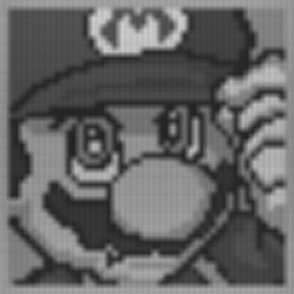

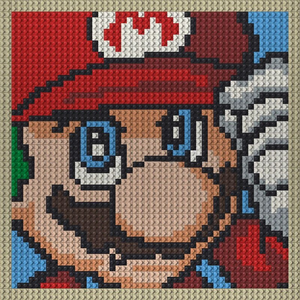

In [572]:
x = Tensor(np.array(img.convert('RGB')), dtype=dtypes.float32)
# x = x.reshape(3, size, size) # wrong
x = x.permute(2, 0, 1).reshape(1, 3, size, size)
print("pixel 00 ", x.numpy()[0][0][0][0], x.numpy()[0][1][0][0], x.numpy()[0][2][0][0])
print("pixel 01 ", x.numpy()[0][0][0][1], x.numpy()[0][1][0][1], x.numpy()[0][2][0][1])
w = Tensor.full((3, 3, 7, 7), 1/147, dtype=dtypes.float32)
x = x.conv2d(w)
print("pixel 00 ", x.numpy()[0][0][0][0], x.numpy()[0][1][0][0], x.numpy()[0][2][0][0])
print("pixel 01 ", x.numpy()[0][0][0][1], x.numpy()[0][1][0][1], x.numpy()[0][2][0][1])
y = x.reshape(3, x.shape[-2], x.shape[-1]).permute(1, 2, 0).cast(dtypes.uint8)
print(y.numpy()[0][0][:])
im = Image.fromarray(y.numpy(), mode="RGB")
display(im, img.convert('RGB'))

# cnn convolutions apply the filter for each channel and sum the result to return a single value
# that's why the image is greyscale

pixel 00  175.0 168.0 139.0
pixel 01  162.0 155.0 126.0
pixel 00  191.125 238.90625 318.54172
pixel 01  186.46997 233.08751 310.78336
[191 238 255]


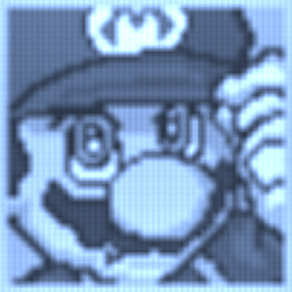

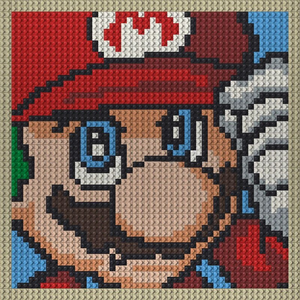

In [592]:
x = Tensor(np.array(img.convert('RGB')), dtype=dtypes.float32)
# x = x.reshape(3, size, size) # wrong
x = x.permute(2, 0, 1).reshape(1, 3, size, size)
print("pixel 00 ", x.numpy()[0][0][0][0], x.numpy()[0][1][0][0], x.numpy()[0][2][0][0])
print("pixel 01 ", x.numpy()[0][0][0][1], x.numpy()[0][1][0][1], x.numpy()[0][2][0][1])
filterR = Tensor.full((1, 3, 9, 9), 1/200, dtype=dtypes.float32)
filterG = Tensor.full((1, 3, 9, 9), 1/160, dtype=dtypes.float32)
filterB = Tensor.full((1, 3, 9, 9), 1/120, dtype=dtypes.float32)
w = Tensor.cat(filterR, filterG, filterB)
x = x.conv2d(w)
print("pixel 00 ", x.numpy()[0][0][0][0], x.numpy()[0][1][0][0], x.numpy()[0][2][0][0])
print("pixel 01 ", x.numpy()[0][0][0][1], x.numpy()[0][1][0][1], x.numpy()[0][2][0][1])
y = x.reshape(3, x.shape[-2], x.shape[-1]).permute(1, 2, 0).cast(dtypes.uint8)
print(y.numpy()[0][0][:])
im = Image.fromarray(y.numpy(), mode="RGB")
display(im, img.convert('RGB'))